### About the dataset (Life Expectancy Data)

The dataset contains the health data of 2938 individuals useful for predicting the life expentency of the individuals. The features are related to economical factors, immunity realted factors, social factors and so on.

Attribute Information:

**Country:** Country of the recorded data

**Year:** Year of the recorded data

**Status:** Status of the country

**Life expectancy:** Life expectancy in age (target/dependent variable)

**Adult mortality:** Rate of adult mortality

**Infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol consumption (in litres of pure alcohol)

**Percentage expenditure:** Expenditure on health as a percentage of GDP

**Hepatitis B:** Hepatitis B immunization coverage among 1-year-olds (%)

**Measles:** Number of reported cases per 1000 population

**BMI:** Average BMI of entire population

**Under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio immunization coverage among 1-year-olds (%)

**Total expenditure:** Government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** DTP3 immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Thinness 1-19 years:** Prevalence of thinness for age 1 to 19 (%)

**Thinness 5-9 years:** Prevalence of thinness for age 5 to 9 (%)

**Income composition of resources:** Human Development Index in terms of income composition of resources

**Schooling:** Number of years of Schooling

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder

#### Load the life expectancy dataset and print the first five observations

In [2]:
# type your code here
df=pd.read_csv("Life+Expectancy+Data.csv")
df.head(5)

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the data type of each variable and if any variable is wrongly identified, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2922 non-null object
Life expectancy                    2928 non-null float64
Adult mortality                    2928 non-null float64
Infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Create a DataFrame containing the count and percentage of missing entries in each variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
a=df.isnull().sum()
print("count of missing values : ",a[a!=0])
b=df.isnull().sum()*100/len(df)
print("percentage of missing values : ",b[b!=0])

count of missing values :  Status                              16
Life expectancy                     10
Adult mortality                     10
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64
percentage of missing values :  Status                              0.544588
Life expectancy                     0.340368
Adult mortality                     0.340368
Alcohol                             6.603131
Hepatitis B                        18.822328
BMI                                 1.157250
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria            

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3a. Are there any extreme values present in the government's total expenditure on health?
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

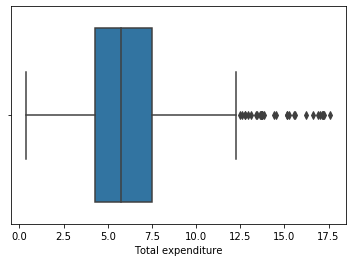

In [6]:
# type your code here
sns.boxplot(df['Total expenditure'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3b. Remove the outliers present in 'Total expenditure' using the quartiles of the variable	
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# type your code here
#llc=q1-(1.5*IQR)
#ulc=q3+(1.5*IQR)
q1=df['Total expenditure'].quantile(0.25)
q2=df['Total expenditure'].quantile(0.5)
q3=df['Total expenditure'].quantile(0.75)
IQR=q3-q1
llc=q1-(1.5*IQR)
ulc=q3+(1.5*IQR)
df[df['Total expenditure']>ulc].shape #32 outliers are present in total_expenditure
# Data after removing Outliers
df1=df[df['Total expenditure']<ulc]
print("Data after removing outliers :",df1.shape)
print("Data before outliers :",df.shape)

Data after removing outliers : (2680, 22)
Data before outliers : (2938, 22)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Split the data such that 'X' will contain all the indepentdent variables and 'y' will contain the target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Hint:** 'Life expectancy' is the target variable depending on the remaining variables.

In [8]:
# type your code here
from sklearn.model_selection import train_test_split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Split the independent variables into two sets with the proportion of 70:30</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
x=df.drop(['Life expectancy'],axis=1)

In [10]:
y=df['Life expectancy']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=0)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. How would you treat the missing values in the variable 'GDP'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# type your code here
df['GDP'].isnull().sum() #448 missing values
df['GDP']=df['GDP'].fillna(df['GDP'].mean())
#checking missing values after treatment
df['GDP'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.There are 16 observations for which the status of the corresponding country is unknown, impute this status with an appropriate values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
df['Status'].unique()

array(['Developing', nan, 'Developed'], dtype=object)

In [15]:
# type your code here
df['Status']=df['Status'].fillna(method='pad')

In [16]:
df['Status'].isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Define a function to find the extreme values in alcohol consumption
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

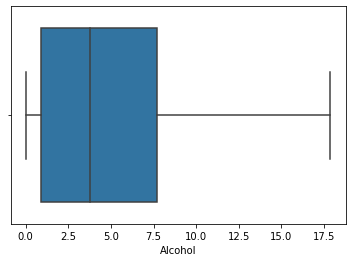

In [18]:
sns.boxplot(df['Alcohol'])
plt.show()

In [22]:
# type your code here
#llc=q1-(1.5*IQR)
#ulc=q3+(1.5*IQR)
q1=df['Alcohol'].quantile(0.25)
q2=df['Alcohol'].quantile(0.5)
q3=df['Alcohol'].quantile(0.75)
IQR=q3-q1
llc=q1-(1.5*IQR)
ulc=q3+(1.5*IQR)
print("ULC :",df[df['Alcohol']>ulc].shape) #0 outliers are present in total_expenditure
print("LLC :",df[df['Alcohol']<llc].shape) #0 outliers

ULC : (0, 22)
LLC : (0, 22)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a column 'Life_expectancy_level' such that it will contain three levels (High, Medium, Low) based on the life expectancy </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
L=[]
for i in df['Life expectancy']:
    if i<q1:
        L.append('Lower')
    elif i>q3:
        L.append('High')
    else:
        L.append('Medium')

In [44]:
len(L)

2938

In [46]:
df['Life_expectancy_level']=L.copy()
df['Life_expectancy_level'].value_counts()   #there are no lower levels in data(<q1)

High      2928
Medium      10
Name: Life_expectancy_level, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Check how life expectancy has changed over the years in China</b>
                </font>
            </div>
        </td>
    </tr>
</table>

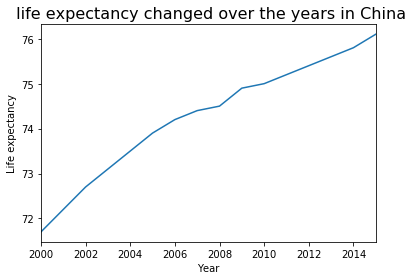

In [23]:
# type your code here
df.groupby(['Country','Year']).mean()['Life expectancy']['China'].plot(kind='line')
plt.ylabel('Life expectancy')
plt.title(" life expectancy changed over the years in China",size=(16))
plt.show()

In [24]:
df.groupby(['Country','Year']).mean()['Life expectancy']['China']

Year
2000    71.7
2001    72.2
2002    72.7
2003    73.1
2004    73.5
2005    73.9
2006    74.2
2007    74.4
2008    74.5
2009    74.9
2010    75.0
2011    75.2
2012    75.4
2013    75.6
2014    75.8
2015    76.1
Name: Life expectancy, dtype: float64